In [2]:
import pandas as pd
# Load the dataset
data = pd.read_csv('StudentsPerformance.csv')
data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
from sklearn.feature_selection import VarianceThreshold

# Keep only numerical columns for VarianceThreshold
num_data = data.select_dtypes(include=[float, int])

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0)
selector.fit(num_data)

# Get constant columns
constant_cols = num_data.columns[~selector.get_support()]

# Drop constant columns from the original dataset
data = data.drop(columns=constant_cols)

print(f"Removed constant columns: {list(constant_cols)}")


Removed constant columns: []


In [5]:
# Identify numerical and categorical columns
num_cols = data.select_dtypes(include=[float, int]).columns
cat_cols = data.select_dtypes(include=[object]).columns

# Replace missing numerical values with mean
data[num_cols] = data[num_cols].apply(lambda col: col.fillna(col.mean()))

# Replace missing categorical values with mode
data[cat_cols] = data[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

print("Missing values handled.")


Missing values handled.


In [6]:
from scipy import stats
import numpy as np

# Choose two numerical columns for outlier removal
num_cols = data.select_dtypes(include=[float, int]).columns.tolist()

for col in num_cols[:2]:
    z_scores = np.abs(stats.zscore(data[col]))
    data = data[(z_scores < 3)]

print(f"Removed outliers from: {num_cols[:2]}")


Removed outliers from: ['math score', 'reading score']


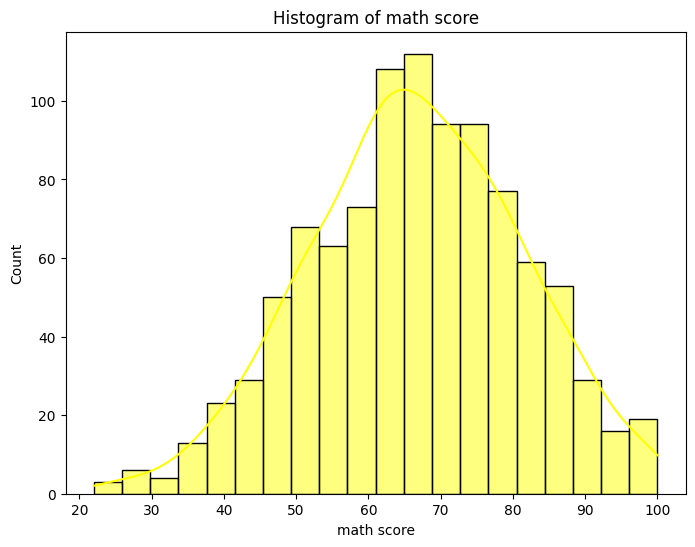

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data[num_cols[0]], kde=True, color='Yellow')
plt.title(f'Histogram of {num_cols[0]}')
plt.show()


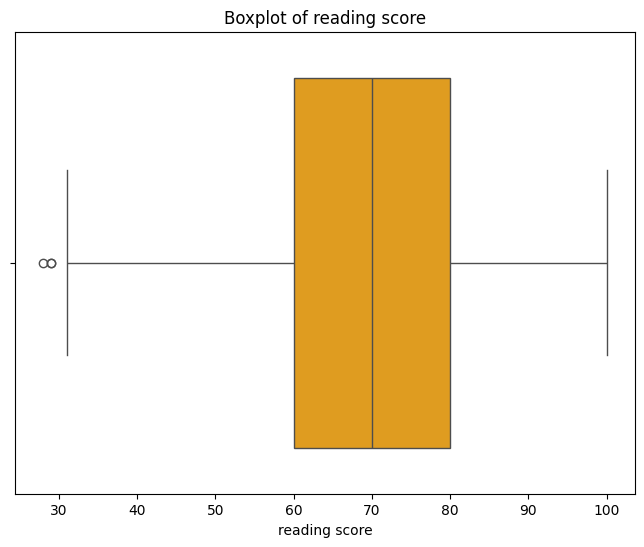

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=data[num_cols[1]],
    color='Orange'
)
plt.title(f'Boxplot of {num_cols[1]}')
plt.show()


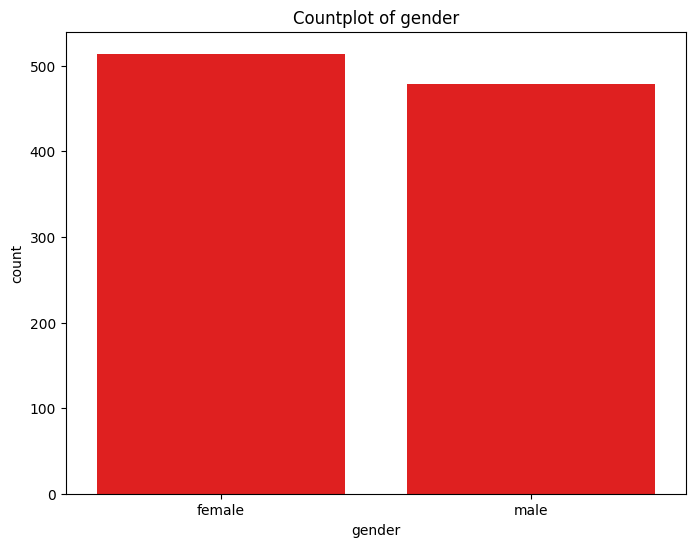

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(
    x=data[cat_cols[0]],
    color='RED'
)
plt.title(f'Countplot of {cat_cols[0]}')
plt.show()
